# WINDII Winds

## Process Temperature and Wind Files

In [1]:
import sys
import os
import pandas as pd

%load_ext autoreload
%autoreload 2

# Get the absolute path of the project root (fpi_ml)
project_root = "/Users/elliotdable/Documents/PhD/research/fpi_ml"
sys.path.append(project_root)

In [2]:
# Now try importing using 'src.'
from src.GNN.load_data import process_windii_files

# Test function
type = 'winds'
base_directory = f"/Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/{type}/best_data"
winds_df = process_windii_files(base_directory, type)

Found 771 .txt files. Processing...
Processing: /Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/winds/best_data/O(1S)_Winds_Daytime/Winds_O1S_1563_70NS_FD1_D.dat
Processing: /Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/winds/best_data/O(1S)_Winds_Daytime/Winds_O1S_0836_70NS_FD1_D.dat
Processing: /Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/winds/best_data/O(1S)_Winds_Daytime/Winds_O1S_0243_70NS_FD1_D.dat
Processing: /Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/winds/best_data/O(1S)_Winds_Daytime/Winds_O1S_1628_70NS_FD1_D.dat
Processing: /Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/winds/best_data/O(1S)_Winds_Daytime/Winds_O1S_0484_70NS_FD1_D.dat
Processing: /Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/winds/best_data/O(1S)_Winds_Daytime/Winds_O1S_0090_70NS_FD1_D.dat
Processing: /Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/winds/best_data/O(1S)_

100%|██████████| 8123364/8123364 [00:35<00:00, 230120.03it/s]


In [3]:
# Test function
type = 'temperatures'
base_directory = f"/Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/{type}"
temps_df = process_windii_files(base_directory, type)

Found 2321 .txt files. Processing...
Processing: /Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/temperatures/O1S_VER_Daytime/O1S_VER_0930_70NS_FD1_D.dat
Processing: /Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/temperatures/O1S_VER_Daytime/O1S_VER_3179_70NS_FD1_D.dat
Processing: /Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/temperatures/O1S_VER_Daytime/O1S_VER_0494_70NS_FD1_D.dat
Processing: /Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/temperatures/O1S_VER_Daytime/O1S_VER_1465_70NS_FD1_D.dat
Processing: /Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/temperatures/O1S_VER_Daytime/O1S_VER_1470_70NS_FD1_D.dat
Processing: /Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/temperatures/O1S_VER_Daytime/O1S_VER_4076_70NS_FD1_D.dat
Processing: /Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/temperatures/O1S_VER_Daytime/O1S_VER_2005_70NS_FD1_D.dat
Processing: /Users

100%|██████████| 55054351/55054351 [04:01<00:00, 228352.95it/s]


In [4]:
temps_df

,profile_number,altitude_number,datetime,glat,glon,local_time,sza,alt,volume_emission_rate,temperature
0,1,28,1910-01-17 01:43:17.256,28.0539,296.448,21.855,147.81690,193.2080,0.649053,0.000
1,1,28,1910-01-17 01:43:17.256,28.0539,296.448,21.855,147.81690,165.9260,6.846470,1020.120
2,1,28,1910-01-17 01:43:17.256,28.0539,296.448,21.855,147.81690,169.8800,3.009260,507.338
3,1,28,1910-01-17 01:43:17.256,28.0539,296.448,21.855,147.81690,173.8140,1.068450,0.000
4,1,28,1910-01-17 01:43:17.256,28.0539,296.448,21.855,147.81690,177.7300,0.692247,0.000
...,...,...,...,...,...,...,...,...,...,...
55054346,525,64,1999-12-23 23:03:32.040,39.9760,339.413,21.882,148.76469,84.8628,-6.040670,0.000
55054347,525,64,1999-12-23 23:03:32.040,39.9760,339.413,21.882,148.76469,82.6936,-5.568290,0.000
55054348,525,64,1999-12-23 23:03:32.040,39.9760,339.413,21.882,148.76469,80.5189,-5.095580,0.000
55054349,525,64,1999-12-23 23:03:32.040,39.9760,339.413,21.882,148.76469,76.1565,-1.832010,0.000


Filter the WINDII files to the location of the FPI

In [5]:
# filtering out ridiculous values for wind speed and esnuring we are just looking at the data in Scandinavia
windii_winds = winds_df[abs(winds_df['zonal_wind_speed']) <= 3000]
windii_winds = windii_winds[abs(windii_winds['meridional_wind_speed']) <= 3000]
scandinavian_windii_winds = windii_winds[(windii_winds['glat'] >= 64) & (windii_winds['glat'] <= 72) & (windii_winds['glon'] >= 10) & (windii_winds['glon'] <= 30)]

In [ ]:
# filtering out ridiculous values for wind speed and esnuring we are just looking at the data in Scandinavia
#windii_temps = temps_df[(abs(temps_df['temperature']) <= 3000) & (temps_df['temperature'] >= 100)]
scandinavian_windii_temps = windii_temps[(windii_temps['glat'] >= 64) & (windii_temps['glat'] <= 72) & (windii_temps['glon'] >= 10) & (windii_temps['glon'] <= 30)]

In [35]:
scandinavian_windii_temps = scandinavian_windii_temps[(scandinavian_windii_temps['alt'] <= 250) & (scandinavian_windii_temps['alt'] >= 200)]
scandinavian_windii_winds = scandinavian_windii_winds[(scandinavian_windii_winds['alt'] <= 250) & (scandinavian_windii_winds['alt'] >= 200)]

In [ ]:
scandinavian_windii_temps_1991_1999 = scandinavian_windii_temps[(scandinavian_windii_temps['datetime'].dt.year >= 1991) & (scandinavian_windii_temps['datetime'].dt.year <= 1999)]
scandinavian_windii_temps_1991_1999

In [ ]:
#scandinavian_windii_temps_1991_1999.to_csv('/Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/parsed/scandinavian_windii_temps_1991_1999.csv', index=False)
#scandinavian_windii_winds.to_csv('/Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/parsed/scandinavian_windii_winds_1991_1999.csv', index=False)

## Plotting Data Locations

In [5]:
import pandas as pd
temps_df = pd.read_csv('/Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/parsed/sampled_windii_temps_200_300km_cleaned.csv', parse_dates=['datetime'])

In [6]:
temps_df.columns

Index(['Unnamed: 0', 'datetime', 'observation_latitude',
       'observation_longitude', 'altitude', 'solar_zenith_angle',
       'temperature', 'ap'],
      dtype='object')

In [ ]:
import numpy as np

new_df = temps_df[(temps_df['datetime'].dt.year < 1994)]
print(new_df.shape[0]/1e6)

new_df['date'] = pd.to_datetime(new_df['datetime']).dt.date
rows_per_date = 2_000_000 // new_df['date'].nunique()
new_df['_rand'] = np.random.rand(len(new_df))
sampled_df = (
    new_df
    .sort_values('_rand')
    .groupby('date')
    .head(rows_per_date)
    .drop(columns=['_rand', 'date'])
)

/var/folders/pf/x6mn9jt96z14ybg9rxsvmb100000gn/T/ipykernel_30533/1845769863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = pd.to_datetime(new_df['datetime']).dt.date
/var/folders/pf/x6mn9jt96z14ybg9rxsvmb100000gn/T/ipykernel_30533/1845769863.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['_rand'] = np.random.rand(len(new_df))


In [7]:
sampled_df = sampled_df.sort_values('datetime')
sampled_df.shape

(1596391, 7)

In [8]:
sampled_df.dtypes

datetime                 datetime64[ns]
observation_latitude            float64
observation_longitude           float64
altitude                        float64
solar_zenith_angle              float64
temperature                     float64
ap                                int64
dtype: object

In [ ]:
sampled_df.to_csv('/Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/parsed/sampled_windii_temps_200_300km_cleaned.csv', index=False)

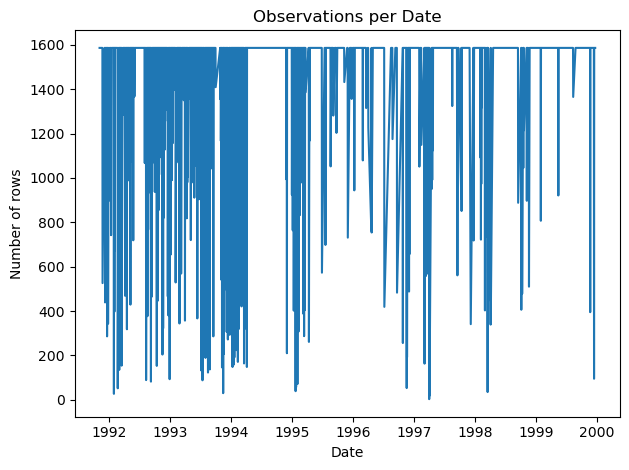

In [27]:
from matplotlib import pyplot as plt
(
    sampled_df.assign(date=sampled_df['datetime'].dt.date)
      .groupby('date')
      .size()
      .plot()
)
plt.xlabel("Date")
plt.ylabel("Number of rows")
plt.title("Observations per Date")
plt.tight_layout()
plt.show()


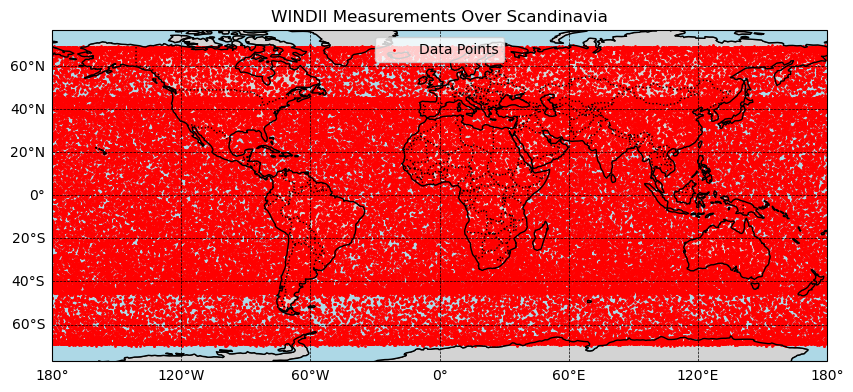

In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner as gridliner

# Assuming your DataFrame is named `df` with columns "glat" and "glon"
#df = scandinavian_windii_winds.copy()  # Replace with your actual DataFrame
df = sampled_df.sample(n=100000, random_state=1)  # Sample for quicker plotting

# Create figure and axis with a map projection
fig, ax = plt.subplots(figsize=(10,5), subplot_kw={'projection': ccrs.PlateCarree()})

# Set the map extent to cover Scandinavia
#ax.set_extent([-5, 35, 55, 75], crs=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Add latitude and longitude gridlines
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color='black')

# Customize gridline labels
gl.top_labels = False  # Hide labels at the top
gl.right_labels = False  # Hide labels on the right
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Plot the latitude and longitude points
ax.scatter(df['observation_longitude'], df['observation_latitude'], color='red', s=1, transform=ccrs.PlateCarree(), label="Data Points")

# Add labels and title
plt.title("WINDII Measurements Over Scandinavia")
plt.legend()

# Show the plot
plt.show()

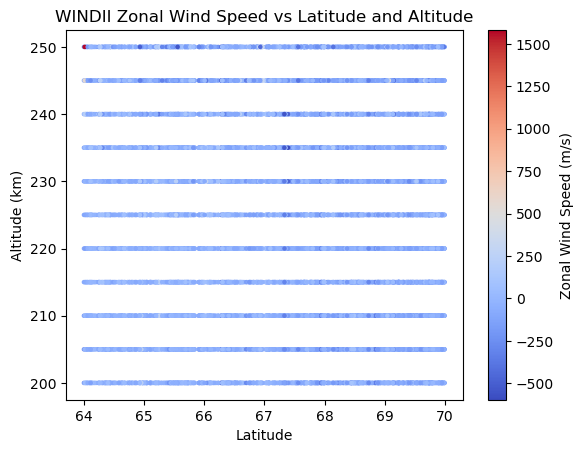

In [44]:
plt.scatter(scandinavian_windii_winds.glat, scandinavian_windii_winds.alt, s=5, c=scandinavian_windii_winds.zonal_wind_speed, cmap='coolwarm')
plt.colorbar(label='Zonal Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.ylabel('Altitude (km)')
plt.title('WINDII Zonal Wind Speed vs Latitude and Altitude')
plt.show()

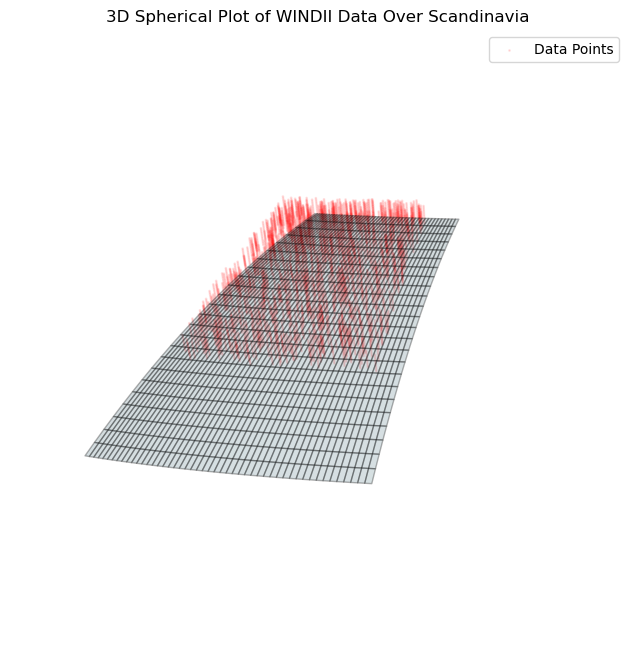

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the glat/glon bounds for Scandinavia
#lat_min, lat_max = 60, 75  # Scandinavia glat range
#lon_min, lon_max = 0, 30   # Scandinavia glon range

# Filter data within this region
#df_filtered = df[(df['glat'] >= lat_min) & (df['glat'] <= lat_max) &
#                 (df['glon'] >= lon_min) & (df['glon'] <= lon_max)]

df_filtered = df.copy()
# Convert degrees to radians
lat_radians = np.radians(df_filtered['glat'])
lon_radians = np.radians(df_filtered['glon'])

# Define Earth's radius in km
R_earth = 6371  # Earth's average radius in km

# Convert to Cartesian coordinates (x, y, z)
alt_km = df_filtered['alt']  # Assuming alt is in km
r = R_earth + alt_km  # Total radius at given alt

x = r * np.cos(lat_radians) * np.cos(lon_radians)
y = r * np.cos(lat_radians) * np.sin(lon_radians)
z = r * np.sin(lat_radians)

# Create a 3D figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot only part of the Earth relevant to the region
u, v = np.mgrid[lon_min:lon_max:50j, lat_min:lat_max:25j]
X = R_earth * np.cos(np.radians(v)) * np.cos(np.radians(u))
Y = R_earth * np.cos(np.radians(v)) * np.sin(np.radians(u))
Z = R_earth * np.sin(np.radians(v))
ax.plot_surface(X, Y, Z, color='lightblue', alpha=0.3, edgecolor='k')

# Plot the altitude data points
ax.scatter(x, y, z, color='red', s=1, alpha=0.1, label="Data Points")

# Labels and title
ax.set_title("3D Spherical Plot of WINDII Data Over Scandinavia")

# Remove the XYZ axis ticks and labels
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_zticks([])  # Remove z-axis ticks

# Set radius as the 'distance' from the center of the Earth
ax.set_xlabel("Radius (km)", labelpad=20)  # Custom label for the radial direction
ax.set_ylabel("Radius (km)", labelpad=20)  # Custom label for the radial direction
ax.set_zlabel("Radius (km)", labelpad=20)  # Custom label for the radial direction

# Adjust the viewing angle to focus on the radial aspect
ax.view_init(elev=5, azim=50)  # Looking from the side at a radial view

# Remove the axes grid
ax.grid(False)

# Make the axis lines invisible
ax.set_axis_off()

plt.legend()
plt.show()

## Plotting Statistics Temperatures

Overall distribution

In [5]:
filtered_df = temps_df[(temps_df["temperature"] != 0) & (temps_df["temperature"] < 4000) & (temps_df["datetime"].dt.year > 1950) & (temps_df["alt"] >= 200) & (temps_df["alt"] <= 300)
                       & (temps_df["glon"] > 0)]
filtered_df = filtered_df.rename(columns={"glat": "observation_latitude", "glon": "observation_longitude", "alt": "altitude", "sza": "solar_zenith_angle"})
filtered_df = filtered_df.drop(columns=["profile_number", "altitude_number"])

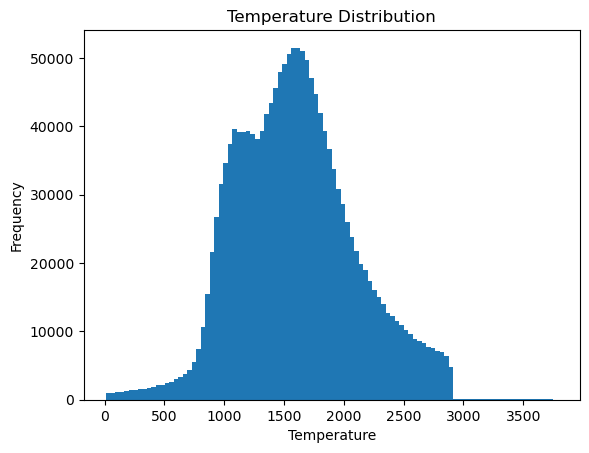

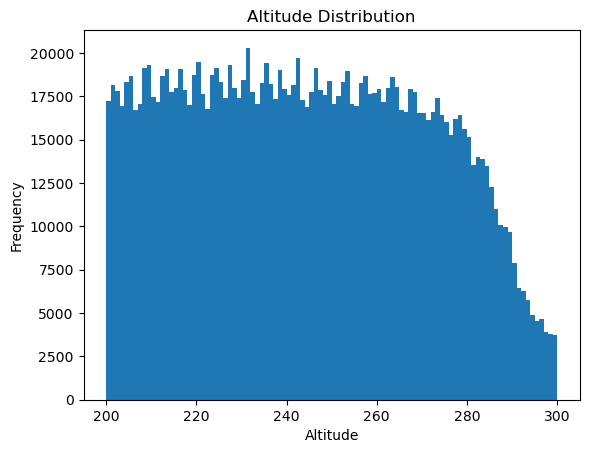

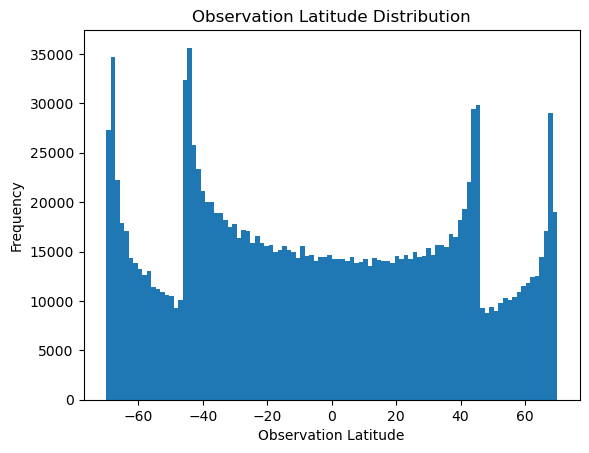

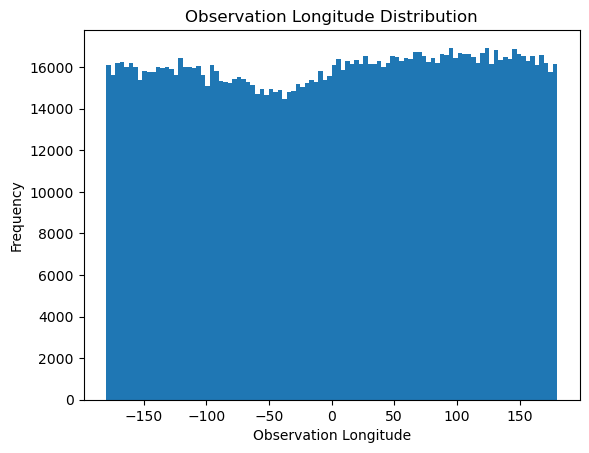

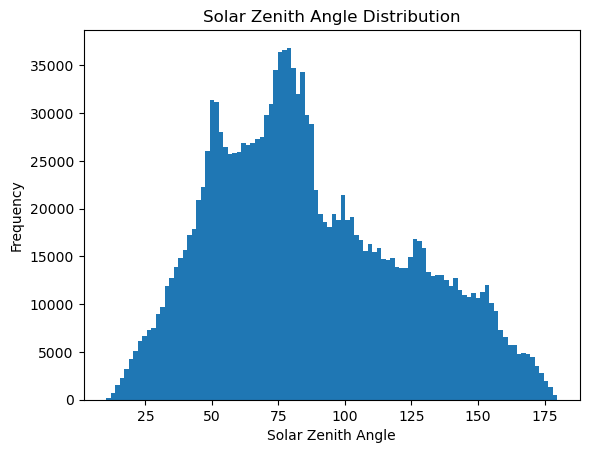

In [8]:
import matplotlib.pyplot as plt

plt.hist(temps_df['temperature'], bins=100)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

plt.hist(temps_df['altitude'], bins=100)
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.title('Altitude Distribution')
plt.show()

plt.hist(temps_df['observation_latitude'], bins=100)
plt.xlabel('Observation Latitude')
plt.ylabel('Frequency')
plt.title('Observation Latitude Distribution')
plt.show()

plt.hist(temps_df['observation_longitude'], bins=100)
plt.xlabel('Observation Longitude')
plt.ylabel('Frequency')
plt.title('Observation Longitude Distribution')
plt.show()

plt.hist(temps_df['solar_zenith_angle'], bins=100)
plt.xlabel('Solar Zenith Angle')
plt.ylabel('Frequency')
plt.title('Solar Zenith Angle Distribution')
plt.show()

In [7]:
filtered_df.observation_longitude.min(), filtered_df.observation_longitude.max()

(0.000424176, 359.999)

In [8]:
from timezonefinder import TimezoneFinder

tf = TimezoneFinder()

def get_timezone(lat, lon):
    return tf.timezone_at(lat=lat, lng=lon)

filtered_df["observation_longitude"] = (
    (filtered_df["observation_longitude"] + 180) % 360
) - 180

In [10]:
filtered_df

,datetime,observation_latitude,observation_longitude,local_time,solar_zenith_angle,altitude,volume_emission_rate,temperature
3641010,1991-11-04 01:41:31.272,23.9666,108.331,8.906,56.419903,218.542,357.903000,1020.00
3641011,1991-11-04 01:41:31.272,23.9666,108.331,8.906,56.419903,275.854,212.509000,1283.15
3641012,1991-11-04 01:41:31.272,23.9666,108.331,8.906,56.419903,203.462,364.260000,1023.61
3641013,1991-11-04 01:41:31.272,23.9666,108.331,8.906,56.419903,211.040,360.539000,1014.44
3641015,1991-11-04 01:41:31.272,23.9666,108.331,8.906,56.419903,225.969,348.268000,1032.72
...,...,...,...,...,...,...,...,...
55054339,1999-12-23 23:03:32.040,39.9760,-20.587,21.882,148.764690,218.750,1.055890,2273.58
55054340,1999-12-23 23:03:32.040,39.9760,-20.587,21.882,148.764690,215.025,0.886835,2249.51
55054341,1999-12-23 23:03:32.040,39.9760,-20.587,21.882,148.764690,211.281,0.795079,2191.54
55054342,1999-12-23 23:03:32.040,39.9760,-20.587,21.882,148.764690,207.519,0.912861,2202.29


In [12]:
filtered_df["timezone"] = filtered_df.apply(
    lambda r: get_timezone(
        r["observation_latitude"],
        r["observation_longitude"]
    ),
    axis=1
)
filtered_df["datetime"] = pd.to_datetime(filtered_df["datetime"]).dt.tz_localize("UTC")

In [13]:
from zoneinfo import ZoneInfo

filtered_df["datetime_local"] = filtered_df.apply(
    lambda r: r["datetime"].tz_convert(ZoneInfo(r["timezone"]))
    if r["timezone"] is not None else pd.NaT,
    axis=1
)

In [28]:
filtered_df

,datetime,observation_latitude,observation_longitude,local_time,solar_zenith_angle,altitude,volume_emission_rate,temperature,timezone,datetime_local
3641010,1991-11-04 01:41:31.272000+00:00,23.9666,108.331,8.906,56.419903,218.542,357.903000,1020.00,Asia/Shanghai,1991-11-04 09:41:31.272000+08:00
3641011,1991-11-04 01:41:31.272000+00:00,23.9666,108.331,8.906,56.419903,275.854,212.509000,1283.15,Asia/Shanghai,1991-11-04 09:41:31.272000+08:00
3641012,1991-11-04 01:41:31.272000+00:00,23.9666,108.331,8.906,56.419903,203.462,364.260000,1023.61,Asia/Shanghai,1991-11-04 09:41:31.272000+08:00
3641013,1991-11-04 01:41:31.272000+00:00,23.9666,108.331,8.906,56.419903,211.040,360.539000,1014.44,Asia/Shanghai,1991-11-04 09:41:31.272000+08:00
3641015,1991-11-04 01:41:31.272000+00:00,23.9666,108.331,8.906,56.419903,225.969,348.268000,1032.72,Asia/Shanghai,1991-11-04 09:41:31.272000+08:00
...,...,...,...,...,...,...,...,...,...,...
55054324,1999-12-23 23:03:32.040000+00:00,39.9760,-20.587,21.882,148.764690,275.781,0.629756,2346.69,Etc/GMT+1,1999-12-23 22:03:32.040000-01:00
55054322,1999-12-23 23:03:32.040000+00:00,39.9760,-20.587,21.882,148.764690,282.569,1.890190,2902.95,Etc/GMT+1,1999-12-23 22:03:32.040000-01:00
55054318,1999-12-23 23:03:32.040000+00:00,39.9760,-20.587,21.882,148.764690,233.462,1.072610,1878.09,Etc/GMT+1,1999-12-23 22:03:32.040000-01:00
55054333,1999-12-23 23:03:32.040000+00:00,39.9760,-20.587,21.882,148.764690,244.297,1.045800,2571.92,Etc/GMT+1,1999-12-23 22:03:32.040000-01:00


In [40]:
filtered_df['datetime'] = filtered_df['datetime'].dt.tz_localize(None)
filtered_df['datetime_local'] = pd.to_datetime(
    filtered_df['datetime_local'],
    utc=True
).dt.tz_localize(None)

In [44]:
filtered_df.dtypes

datetime                 datetime64[ns]
observation_latitude            float64
observation_longitude           float64
local_time                      float64
solar_zenith_angle              float64
altitude                        float64
volume_emission_rate            float64
temperature                     float64
timezone                         object
datetime_local           datetime64[ns]
dtype: object

In [45]:
geomag_df = pd.read_csv('/Users/elliotdable/Documents/PhD/research/fpi_ml/data/geomag_data/solar_geomag_dst_data.csv')

# Ensure both datetime columns are real datetime dtype
filtered_df['datetime'] = pd.to_datetime(filtered_df['datetime'])
geomag_df['datetime'] = pd.to_datetime(geomag_df['datetime'])

# Sort before merge_asof (required)
filtered_df = filtered_df.sort_values('datetime')
geomag_df = geomag_df.sort_values('datetime')

# Merge AP30 onto FPI data by nearest datetime
filtered_df = pd.merge_asof(
    filtered_df,
    geomag_df[['datetime', 'ap30']],   # only need datetime + ap30
    on='datetime',
    direction='nearest'                # choose closest match
)

windii_200_300_df = filtered_df.rename(columns={'ap30': 'ap'})

In [ ]:
windii_200_300_df = windii_200_300_df.drop(columns=['timezone', 'datetime'])
windii_200_300_df = windii_200_300_df.rename(columns={'datetime_local': 'datetime'})

In [51]:
windii_200_300_df = windii_200_300_df[['datetime', 'observation_latitude', 'observation_longitude', 'altitude', 'solar_zenith_angle', 'temperature', 'ap']]
windii_200_300_df

,datetime,observation_latitude,observation_longitude,altitude,solar_zenith_angle,temperature,ap
0,1991-11-04 01:41:31.272,23.9666,108.331,218.542,56.419903,1020.00,22
1,1991-11-04 01:41:31.272,23.9666,108.331,275.854,56.419903,1283.15,22
2,1991-11-04 01:41:31.272,23.9666,108.331,203.462,56.419903,1023.61,22
3,1991-11-04 01:41:31.272,23.9666,108.331,211.040,56.419903,1014.44,22
4,1991-11-04 01:41:31.272,23.9666,108.331,225.969,56.419903,1032.72,22
...,...,...,...,...,...,...,...
17371129,1999-12-23 23:03:32.040,39.9760,-20.587,215.025,148.764690,2249.51,9
17371130,1999-12-23 23:03:32.040,39.9760,-20.587,211.281,148.764690,2191.54,9
17371131,1999-12-23 23:03:32.040,39.9760,-20.587,237.093,148.764690,2126.42,9
17371132,1999-12-23 23:03:32.040,39.9760,-20.587,240.705,148.764690,2380.70,9


In [52]:
windii_200_300_df.to_csv('/Users/elliotdable/Documents/PhD/research/fpi_ml/data/WINDII_data/parsed/windii_temps_200_300km_cleaned.csv', index=False)

By Hour of the Day

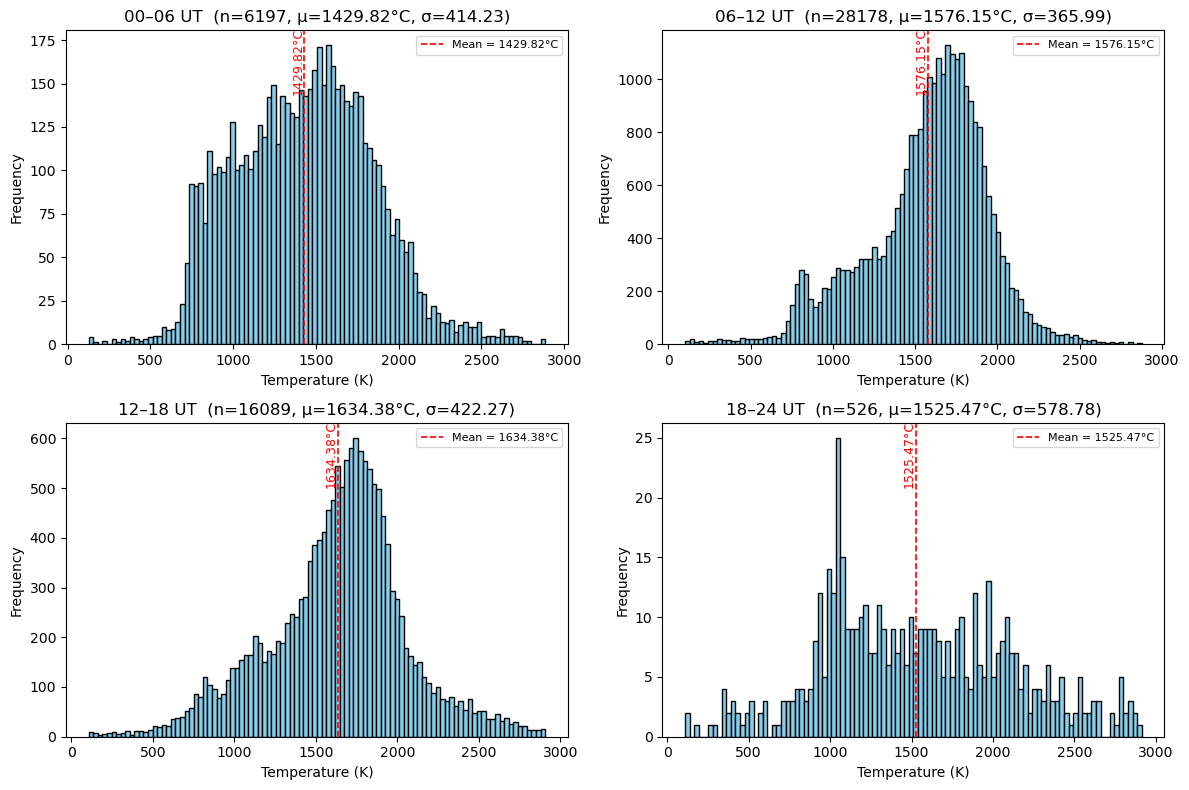

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime column is in datetime format
scandinavian_windii_temps['datetime'] = pd.to_datetime(scandinavian_windii_temps['datetime'])

# Extract hour from datetime
scandinavian_windii_temps['hour'] = scandinavian_windii_temps['datetime'].dt.hour

# Define the four time ranges
time_ranges = [(0, 6), (6, 12), (12, 18), (18, 24)]
labels = ['00–06 UT', '06–12 UT', '12–18 UT', '18–24 UT']

# Set up subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Loop through each range and plot histogram
for i, (start, end) in enumerate(time_ranges):
    subset = scandinavian_windii_temps[
        (scandinavian_windii_temps['hour'] >= start) &
        (scandinavian_windii_temps['hour'] < end)
    ]
    
    n = len(subset)
    mean_temp = subset['temperature'].mean()
    std_temp = subset['temperature'].std()
    
    # Plot histogram
    axes[i].hist(subset['temperature'], bins=100, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{labels[i]}  (n={n}, μ={mean_temp:.2f}°C, σ={std_temp:.2f})')
    axes[i].set_xlabel('Temperature (K)')
    axes[i].set_ylabel('Frequency')
    
    # Mean line
    axes[i].axvline(mean_temp, color='red', linestyle='dashed', linewidth=1.2, label=f'Mean = {mean_temp:.2f}°C')
    
    # Annotate mean
    axes[i].text(mean_temp, axes[i].get_ylim()[1]*0.9, f'{mean_temp:.2f}°C',
                 rotation=90, color='red', ha='right', va='center', fontsize=9)
    
    # Optional: legend for clarity
    axes[i].legend(fontsize=8)

plt.tight_layout()
plt.show()


By Season

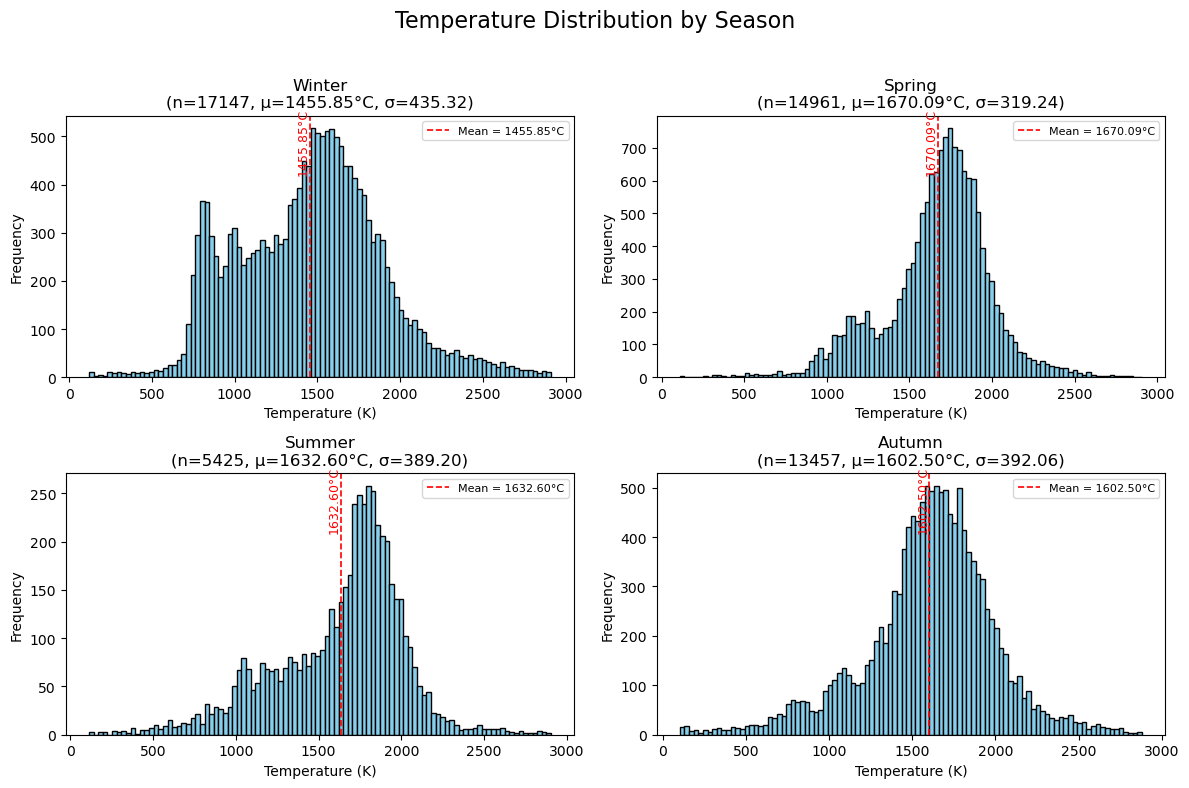

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime is parsed correctly
scandinavian_windii_temps['datetime'] = pd.to_datetime(scandinavian_windii_temps['datetime'])

# Extract month
scandinavian_windii_temps['month'] = scandinavian_windii_temps['datetime'].dt.month

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

scandinavian_windii_temps['season'] = scandinavian_windii_temps['month'].apply(get_season)

# List of seasons in desired order
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
fig.suptitle('Temperature Distribution by Season', fontsize=16)

for i, season in enumerate(seasons):
    subset = scandinavian_windii_temps[scandinavian_windii_temps['season'] == season]
    
    n = len(subset)
    mean_temp = subset['temperature'].mean()
    std_temp = subset['temperature'].std()
    
    axes[i].hist(subset['temperature'], bins=100, color='skyblue', edgecolor='black')
    
    # Add red line at mean
    axes[i].axvline(mean_temp, color='red', linestyle='dashed', linewidth=1.2, label=f'Mean = {mean_temp:.2f}°C')
    
    # Annotate mean value
    axes[i].text(mean_temp, axes[i].get_ylim()[1]*0.9, f'{mean_temp:.2f}°C',
                 rotation=90, color='red', ha='right', va='center', fontsize=9)
    
    # Title with stats
    axes[i].set_title(f'{season}\n(n={n}, μ={mean_temp:.2f}°C, σ={std_temp:.2f})')
    
    axes[i].set_xlabel('Temperature (K)')
    axes[i].set_ylabel('Frequency')
    axes[i].legend(fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Plotting Statistics Winds

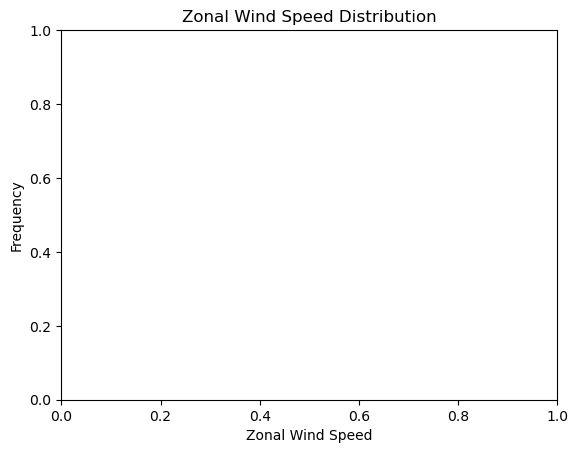

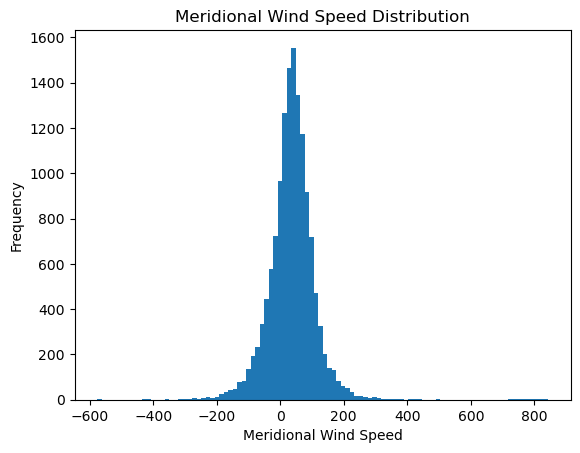

In [16]:
import matplotlib.pyplot as plt
plt.xlabel('Zonal Wind Speed')
plt.ylabel('Frequency')
plt.title('Zonal Wind Speed Distribution')
plt.show()

plt.hist(scandinavian_windii_winds['meridional_wind_speed'], bins=100)
plt.xlabel('Meridional Wind Speed')
plt.ylabel('Frequency')
plt.title('Meridional Wind Speed Distribution')
plt.show()